Import the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Prepare the data

In [5]:
X = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer

In [6]:
num_input = 2
num_hidden = 5
num_output = 1

Initialize the weights and bias randomly. First, we initialize the input to
hidden layer weights:

In [7]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

Now, we initialize the hidden to output layer weights:

In [8]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

Define the sigmoid activation function:

In [9]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function:

In [10]:
def sigmoid_derivative(z):
  return np.exp(-z)/((1+np.exp(-z))**2)

Define the forward propagation:

In [11]:
def forward_prop(X,Wxh,Why):
  z1 = np.dot(X,Wxh) + bh
  a1 = sigmoid(z1)
  z2 = np.dot(a1,Why) + by
  y_hat = sigmoid(z2)
  return z1,a1,z2,y_hat

Define the backward propagation:

In [12]:
def backword_prop(y_hat, z1, a1, z2):
  delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
  dJ_dWhy = np.dot(a1.T, delta2)
  delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
  dJ_dWxh = np.dot(X.T, delta1)
  return dJ_dWxh, dJ_dWhy

Define the cost function

In [13]:
def cost_function(y, y_hat):
  J = 0.5*sum((y-y_hat)**2)
  return J

Set the learning rate and the number of training iterations

In [14]:
alpha = 0.01
num_iterations = 5000

Now, let's start training the network with the following code:

In [15]:
cost =[]
for i in range(num_iterations):
  z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
  dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
  Wxh = Wxh -alpha * dJ_dWxh
  Why = Why -alpha * dJ_dWhy
  c = cost_function(y, y_hat)
  cost.append(c)

Plot the cost function:

Text(0, 0.5, 'Cost')

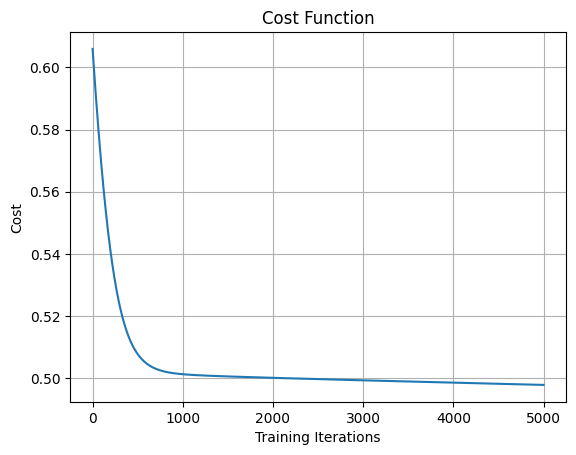

In [17]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')